In [1]:
#%pylab
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from matplotlib import cm
import matplotlib.animation as animation
import matplotlib as mpl
# Plot en 3D
from mpl_toolkits.mplot3d import axes3d

In [2]:
Xmin, Xmax, Npoints_x = 0.,2.,20
Ymin, Ymax, Npoints_y = 0.,2.,20
Tmin, Tmax, Npoints_t = 0.,3.,300

x = np.linspace(Xmin, Xmax, Npoints_x)
y = np.linspace(Ymin, Ymax, Npoints_y)
t = np.linspace(Tmin, Tmax, Npoints_t)

deltat = (Tmax-Tmin)/(Npoints_t-1)
deltax = (Xmax-Xmin)/(Npoints_x-1)
deltay = (Ymax-Ymin)/(Npoints_y-1)

# Velocidad de la onda
v = 3.

lambda_ = v*deltat/deltax
mu_ = v*deltat/deltay

print(deltat, deltax, deltay, lambda_, mu_)

0.010033444816053512 0.10526315789473684 0.10526315789473684 0.2859531772575251 0.2859531772575251


In [3]:
# Definimos condicion inicial para la cuerda

def ui(x,y):
    #return np.sin(np.pi*x)*np.sin(np.pi*y)
    return 2.*(x-1)*(y-1)

#Fronteras moviles

def h1(t):
    return np.sin(np.pi*t)

In [4]:
u = np.zeros((Npoints_t,Npoints_x,Npoints_y))

for i in range(len(x)):
    for j in range(len(y)):
        u[0,i,j] = ui(x[i],y[j])

In [5]:
gamma = 3.*deltat

for t1 in range(1, len(t)):
    
    if(t1 == 1):
        u[t1,:,:] = u[t1-1,:,:] # Si la velocidad de la onda = 0
        
    else:
        
        # Frontera movil
       # u[t1,:,-1] = h1(t[t1])
        
        for i in range(1, len(x) -1):
            for j in range(1, len(y) - 1):
                u[t1,i,j] = 2.*(1- lambda_**2- mu_**2)*u[t1-1,i,j] \
                + lambda_**2 * (u[t1-1,i+1,j]+u[t1-1,i-1,j]) \
                + mu_**2 * (u[t1-1,i,j+1] + u[t1-1,i,j-1]) \
                - u[t1-2,i,j] \
                - gamma*u[t1-1,i,j] + gamma*u[t1-2,i,j] # Friccion

<IPython.core.display.Javascript object>


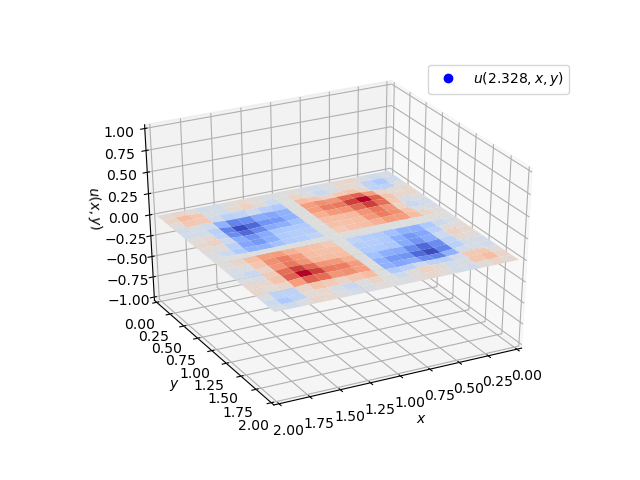

In [6]:
# Zona de animacion

Nframes = len(t) 

fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection = '3d',elev = 30, azim = 50)

X, Y = np.meshgrid(x,y)

def init():
    
    ax.set_xlim3d(Xmin,Xmax)
    ax.set_ylim3d(Ymin,Ymax)
    ax.set_zlim3d(-1.,1.)
    
    ax.set_xlabel('$x$', fontsize=10)
    ax.set_ylabel('$y$', fontsize=10)
    ax.set_zlabel(r'$u(x,y)$', fontsize=10)
    
    #ax.view_init(30,50)
    
def Update(i):
    plot = ax.clear()
    init()
    plot = ax.plot_surface(X, Y, u[i,:,:], cmap=cm.coolwarm) 
    fake2Dline = mpl.lines.Line2D([0],[0], linestyle='none', c='b', marker='o')
    plot = ax.legend([fake2Dline], [r'$u(%.3f,x,y)$' %(t[i])], numpoints=1)
    return plot

Animation = animation.FuncAnimation(fig, Update, frames=Nframes, init_func=init)

In [7]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=10, metadata=dict(artist='Me'), bitrate=1800 )
#Animation.save( 'Onda2D.mp4', writer=writer )